In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = np.load("proyecto_training_data.npy")

In [3]:
dataset.shape

(1460, 6)

In [4]:
train_set= dataset[0:1168,0:]
test_set= dataset[1168:,0:]

train_x_np = dataset[0:1168,1:]
train_y_np = dataset[0:1168,0:1]
test_x_np = dataset[1168:,1:]
test_y_np = dataset[1168:,0:1]

In [5]:
train_x_np.shape

(1168, 5)

In [6]:
train_y_np.shape

(1168, 1)

In [7]:
test_x_np.shape

(292, 5)

In [8]:
test_y_np.shape

(292, 1)

In [9]:
train_set.shape

(1168, 6)

In [10]:
test_set.shape

(292, 6)

In [11]:
dataset_df = pd.DataFrame(dataset,columns=["SalePrice","OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])

train_set_df = pd.DataFrame(train_set,columns=["SalePrice","OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])
test_set_df = pd.DataFrame(test_set,columns=["SalePrice","OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])

train_x_df = pd.DataFrame(train_x_np,columns=["OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])
train_y_df = pd.DataFrame(train_y_np,columns=["SalePrice"])
test_x_df = pd.DataFrame(test_x_np,columns=["OverallQual","1stFloorSF","TotalRooms","YearBuilt","LotFrontage"])
test_y_df = pd.DataFrame(test_y_np,columns=["SalePrice"])

In [35]:
train_set_df.isnull().sum()
#Se comprueba que existen valores no numéricos (NaN) en el data frame de entrenamiento

SalePrice        0
OverallQual      0
1stFloorSF       0
TotalRooms       0
YearBuilt        0
LotFrontage    206
dtype: int64

In [36]:
test_set_df.isnull().sum()
#Se comprueba que existen valores no numéricos (NaN) en el data frame de testeo

SalePrice       0
OverallQual     0
1stFloorSF      0
TotalRooms      0
YearBuilt       0
LotFrontage    53
dtype: int64

In [40]:
#Para limpiar ambos data frames se remplazarán los NaN por ceros (0) en una nueva columna en cada df
no_nan_train=train_set_df.replace(np.nan,0)
no_nan_test=test_set_df.replace(np.nan,0)

train_set_df=pd.DataFrame(no_nan_train)
test_set_df=pd.DataFrame(no_nan_test)

train_set_df.isnull().sum()
#Se comprueba que existen valores no numéricos (NaN) en el data frame de testeo

SalePrice      0
OverallQual    0
1stFloorSF     0
TotalRooms     0
YearBuilt      0
LotFrontage    0
dtype: int64

In [15]:
test_set_df.head()

,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0


In [16]:
print(dataset_df.shape)
dataset_df.head()

(1460, 6)


,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [17]:
print(dataset_df.shape)
dataset_df.describe()

(1460, 6)


,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [18]:
print(train_set_df.shape)
train_set_df.describe()

(1168, 6)


,SalePrice,OverallQual,1stFloorSF,TotalRooms,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,962.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.946985
std,78815.697902,1.378025,373.780374,1.609141,29.951707,23.478161
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.000000
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000


([<matplotlib.axis.XTick at 0x2723c5ab280>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

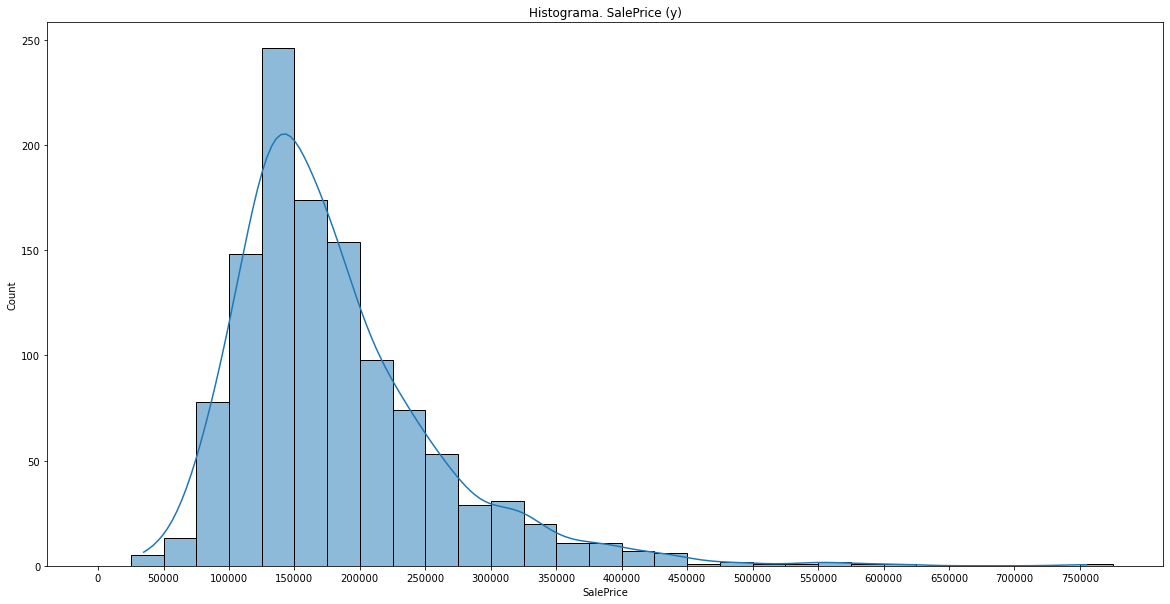

In [19]:
#De acuerdo con documentación de Seaborn, la función seaborn.distplot será descontinuada en el corto plazo, ellos
#recomiendan el uso de displot() o histplot()
plt.figure(figsize=(20,10))
sns.histplot(data=train_set_df,x="SalePrice",bins=np.arange(0,800000,25000),kde=True).set(title="Histograma. SalePrice (y)")
plt.xticks(np.arange(0,800000,50000))

([<matplotlib.axis.XTick at 0x2723d74aa30>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

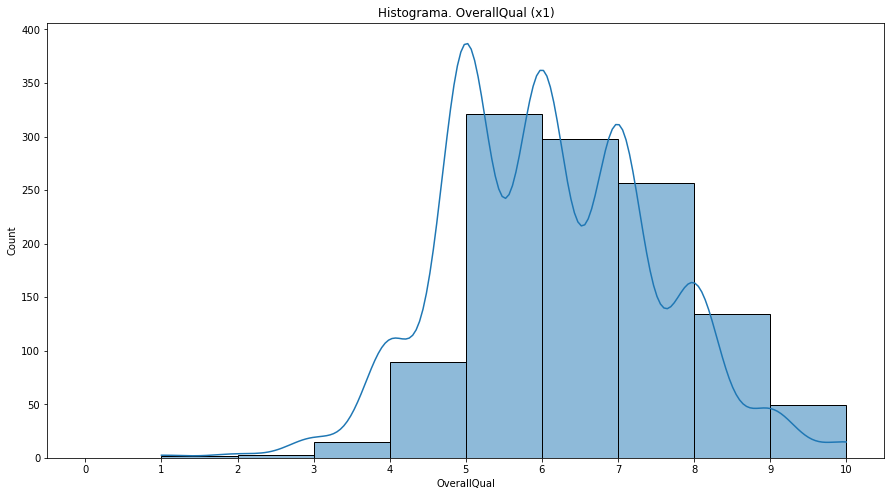

In [20]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="OverallQual",bins=np.arange(0,11,1),kde=True).set(title="Histograma. OverallQual (x1)")
plt.xticks(np.arange(0,11,1))

[Text(0.5, 1.0, 'Histograma. 1stFloorSF (x2)')]

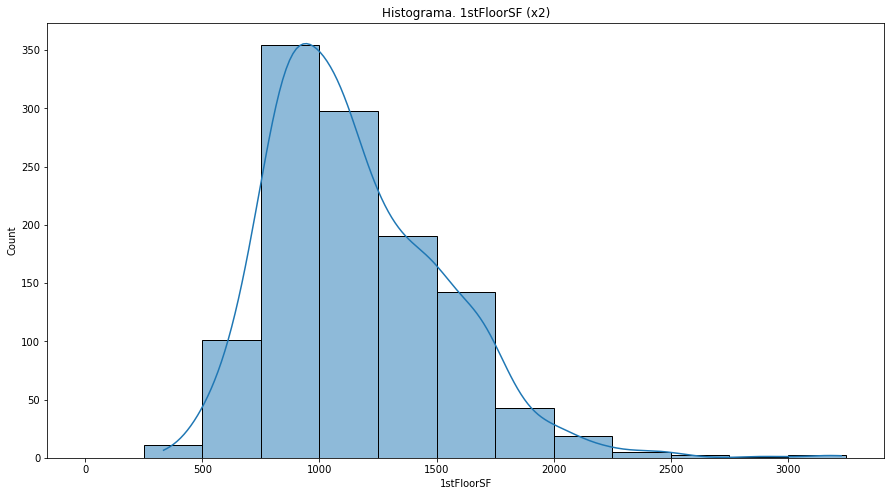

In [21]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="1stFloorSF",bins=np.arange(0,3500,250),kde=True).set(title="Histograma. 1stFloorSF (x2)")
#plt.xticks(np.arange(0,11,1))

([<matplotlib.axis.XTick at 0x2723ce26520>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

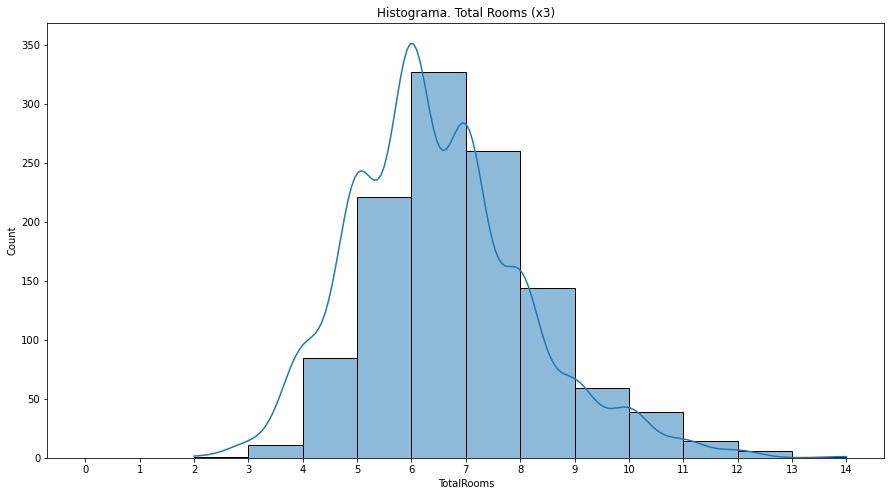

In [22]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="TotalRooms",bins=np.arange(0,15,1),kde=True).set(title="Histograma. Total Rooms (x3)")
plt.xticks(np.arange(0,15,1))

[Text(0.5, 1.0, 'Histograma. Year Built (x4)')]

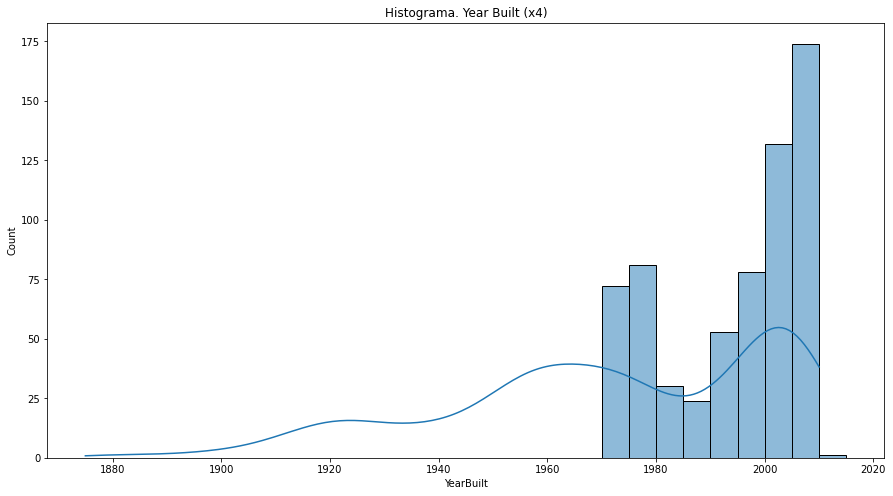

In [23]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="YearBuilt",bins=np.arange(1970,2020,5),kde=True).set(title="Histograma. Year Built (x4)")
#plt.xticks(np.arange(0,15,1))

[Text(0.5, 1.0, 'Histograma. Lot Frontage (x5)')]

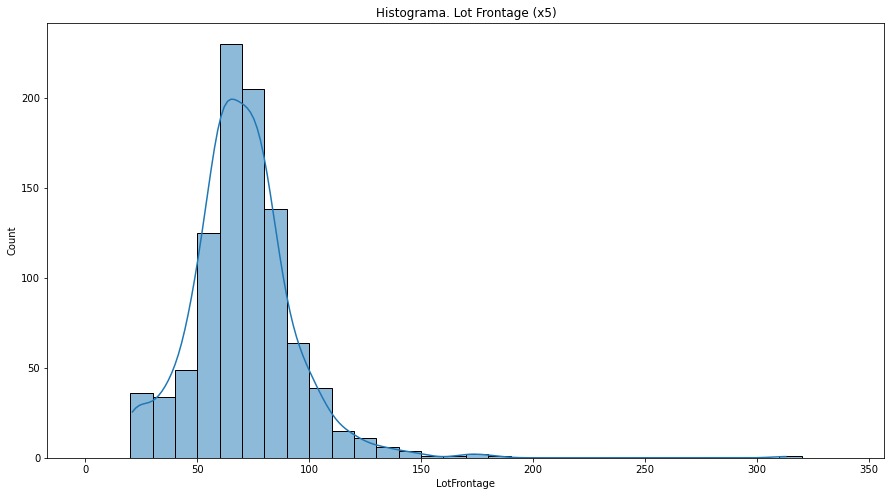

In [24]:
plt.figure(figsize=(15,8))
sns.histplot(data=train_set_df,x="LotFrontage",bins=np.arange(0,350,10),kde=True).set(title="Histograma. Lot Frontage (x5)")
#plt.xticks(np.arange(0,15,1))

### Correlación de las variables independientes (_x_) con la dependiente (_y_)

In [33]:
y_train = dataset[0:1168,0:1]
x1_train = dataset[0:1168,1:2]
x2_train = dataset[0:1168,2:3]
x3_train = dataset[0:1168,3:4]
x4_train = dataset[0:1168,4:5]
x5_train = dataset[0:1168,5:6]
#x5_train = train_set_df_noNaN[5]

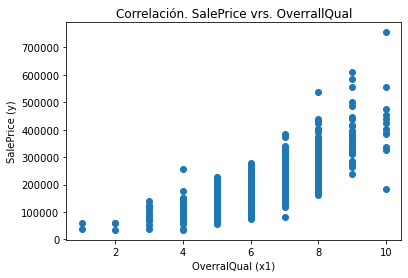

R: 0.7939900504626405


In [28]:
#Se utiliza el coeficiente de Pearson
corr_SalePrice_vrs_OverrallQual=np.corrcoef(train_set_df["SalePrice"],train_set_df["OverallQual"])

plt.scatter(x1_train,y_train)
plt.title("Correlación. SalePrice vrs. OverrallQual")
plt.xlabel("OverralQual (x1)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_OverrallQual[1,0])

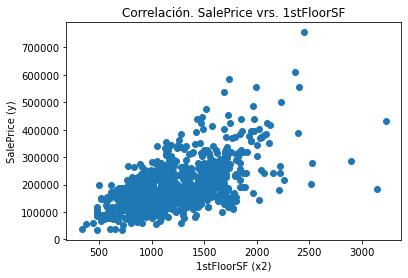

R: 0.6162887000998717


In [29]:
corr_SalePrice_vrs_1stFloorSF=np.corrcoef(train_set_df["SalePrice"],train_set_df["1stFloorSF"])

plt.scatter(x2_train,y_train)
plt.title("Correlación. SalePrice vrs. 1stFloorSF")
plt.xlabel("1stFloorSF (x2)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_1stFloorSF[1,0])

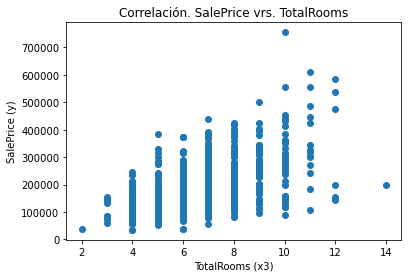

R: 0.5647069399593065


In [30]:
corr_SalePrice_vrs_TotalRooms=np.corrcoef(train_set_df["SalePrice"],train_set_df["TotalRooms"])

plt.scatter(x3_train,y_train)
plt.title("Correlación. SalePrice vrs. TotalRooms")
plt.xlabel("TotalRooms (x3)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_TotalRooms[1,0])

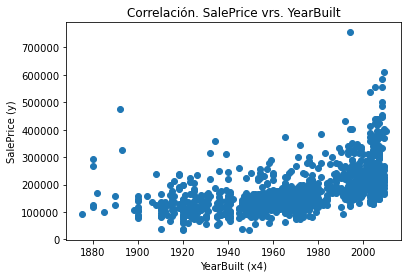

R: 0.5341706927117515


In [31]:
corr_SalePrice_vrs_YearBuilt=np.corrcoef(train_set_df["SalePrice"],train_set_df["YearBuilt"])

plt.scatter(x4_train,y_train)
plt.title("Correlación. SalePrice vrs. YearBuilt")
plt.xlabel("YearBuilt (x4)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_YearBuilt[1,0])

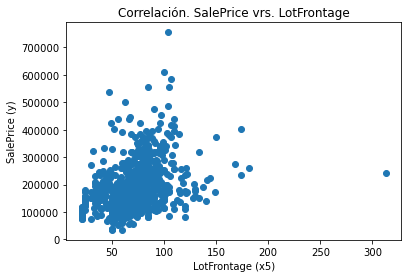

R: nan


In [34]:
corr_SalePrice_vrs_LotFrontage=np.corrcoef(train_set_df["SalePrice"],train_set_df["LotFrontage"])

plt.scatter(x5_train,y_train)
plt.title("Correlación. SalePrice vrs. LotFrontage")
plt.xlabel("LotFrontage (x5)")
plt.ylabel("SalePrice (y)")
plt.show()
print("R:",corr_SalePrice_vrs_LotFrontage[1,0])

In [ ]:
#Qué hacer con valores NaN
print(np.isnan(train_set_df["LotFrontage"]))

In [ ]:
train_set_df.isnull().sum()

In [ ]:
train_set_df_noNaN=train_set_df.fillna(0)
train_set_df_noNaN